In [91]:
import pandas as pd

# create dataframe out of the json data
df = pd.read_json('layer0_paper.json')
paper_titles = df['Ti']
paper_ids = df['Id']
author_list = df['AA']
publish_date = df['D']

In [92]:
# get the authors' full names from each of the original 'AA' entries
def get_AuN(row):
    authors = []
    for author in row:
        authors.append(author['AuN'])
    return authors
author_list = author_list.apply(lambda x: get_AuN(x))

In [93]:
output = pd.DataFrame({'paper_ids': paper_ids, 'paper_titles': paper_titles, 'publish_date': publish_date, 'author_list': author_list})


In [94]:
output.to_csv('publication_data.csv')

In [95]:
# rank the top 10 authors who publish papers most in total
top_authors = output['author_list'].apply(pd.Series).stack().reset_index(drop=True)
top_authors = top_authors.value_counts().head(10)

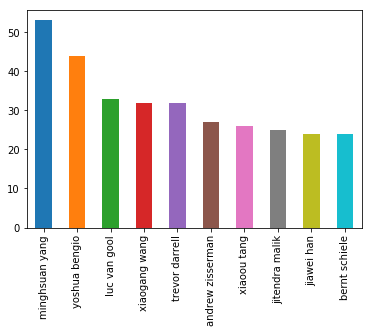

In [97]:
ax = top_authors.plot.bar()